In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
categorical = df.select_dtypes(['category', 'object']).columns

for col in categorical:
    print('{} : {}'.format(col, ', '.join(df[col].unique())))

gender : female, male
race/ethnicity : group B, group C, group A, group D, group E
parental level of education : bachelor's degree, some college, master's degree, associate's degree, high school, some high school
lunch : standard, free/reduced
test preparation course : none, completed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [27]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [39]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [42]:
df_bachelor = df[df['parental level of education'] == "bachelor's degree"]
df_bachelor.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
27,female,group C,bachelor's degree,standard,none,67,69,75
60,male,group E,bachelor's degree,free/reduced,completed,79,74,72
77,male,group A,bachelor's degree,standard,completed,80,78,81


In [43]:
df_master = df[df['parental level of education'] == "master's degree"]
df_master.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
14,female,group A,master's degree,standard,none,50,53,58
18,male,group C,master's degree,free/reduced,completed,46,42,46
25,male,group A,master's degree,free/reduced,none,73,74,72
29,female,group D,master's degree,standard,none,62,70,75


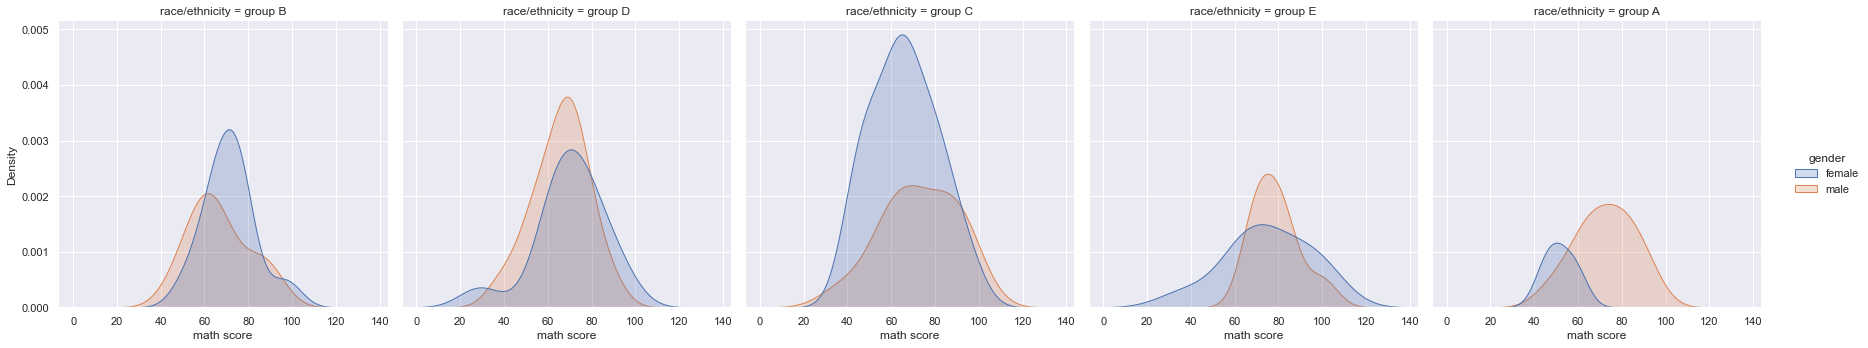

In [56]:
sns.displot(
    data=df_bachelor, 
    x='math score', 
    hue='gender', 
    kind='kde', 
    fill=True,
    col='race/ethnicity'
)

c:\users\wisnoe\anaconda3\envs\coba\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


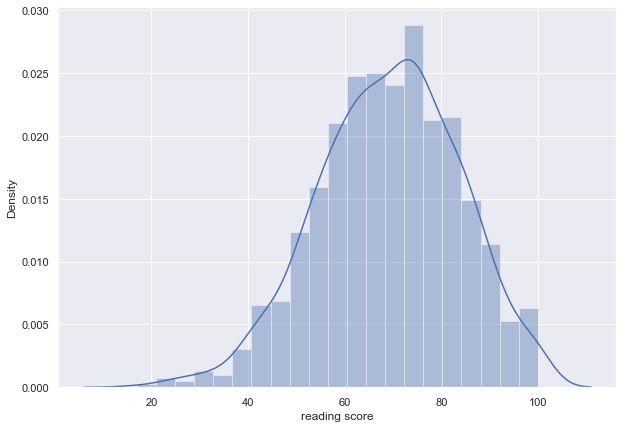

In [21]:
read = sns.distplot(df['reading score'])
sns.set(rc={'figure.figsize':(10,7)})

c:\users\wisnoe\anaconda3\envs\coba\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


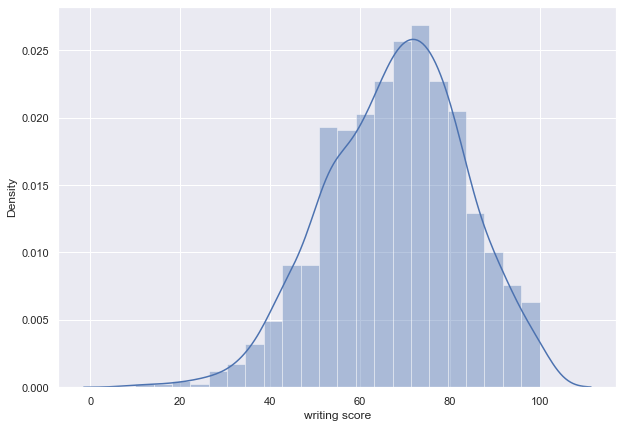

In [31]:
read = sns.distplot(df['writing score'])
sns.set(rc={'figure.figsize':(10,7)})

Compare people good at exact sciences with those who good at humanitarian sciences

In [33]:
 # People with top 15% math score
top_15_math = df['math score'] > df['math score'].quantile(q=0.85)

# People with top 15% writing score
top_15_writing = df['writing score'] > df['writing score'].quantile(q=0.85)

# People with top 15% reading score
top_15_reading = df['reading score'] > df['reading score'].quantile(q=0.85) # People with top 15% reading score

# Summary DataFrame
compare_df = pd.DataFrame({
    'Math': [top_15_math_math_mean, top_15_writing_math_mean, top_15_reading_math_mean],
    'Writing': [top_15_math_writing_mean, top_15_writing_writing_mean, top_15_reading_writing_mean],
    'Rading': [top_15_math_reading_mean, top_15_writing_reading_mean, top_15_reading_reading_mean]
}, index=['Top 15% math score', 'Top 15% writing score', 'Top 15% reading score'])

compare_df.round()

,Math,Writing,Rading
Top 15% math score,90.0,86.0,87.0
Top 15% writing score,85.0,91.0,91.0
Top 15% reading score,84.0,89.0,91.0


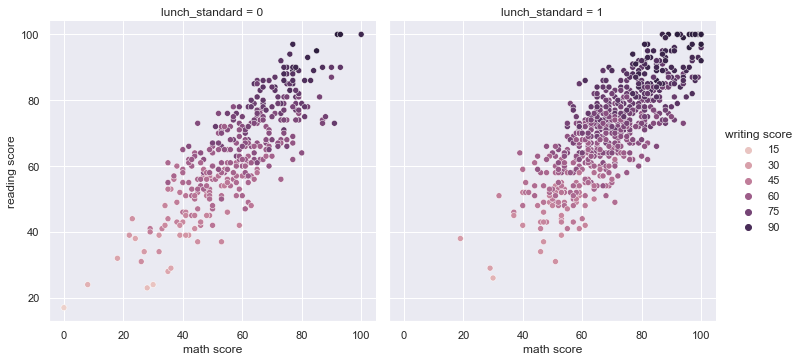

In [38]:
full_df = pd.get_dummies(df)
sns.relplot(data=full_df,x="math score", y="reading score", hue='writing score', col="lunch_standard");

People who eat standard lunch perfom better on tests, especialy in math!